In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/titanic-proper-dataset/train.csv
/kaggle/input/titanic-proper-dataset/test.csv
/kaggle/input/titanic-proper-dataset/gender_submission.csv
/kaggle/input/titanic/tested.csv
/kaggle/input/diabetes-and-cardio-for-ml/cardio_train.csv
/kaggle/input/diabetes-and-cardio-for-ml/diabetes.csv


In [2]:
cardio = '/kaggle/input/diabetes-and-cardio-for-ml/cardio_train.csv'
diabetes = '/kaggle/input/diabetes-and-cardio-for-ml/diabetes.csv'

In [3]:
df_cardio = pd.read_csv(cardio, sep=';')

# Perform EDA in Python

In [4]:
df_cardio.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [5]:
df_cardio['age'] = df_cardio['age']/365

In [6]:
df_cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
df_cardio['age']=df_cardio['age'].round().astype('int64')

In [8]:
df_cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [9]:
df_cardio = df_cardio.drop(columns = 'id')

In [10]:
df_cardio.head(1)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0


In [11]:
df_cardio.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'ap_hi'}>,
        <Axes: title={'center': 'ap_lo'}>],
       [<Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'gluc'}>,
        <Axes: title={'center': 'smoke'}>],
       [<Axes: title={'center': 'alco'}>,
        <Axes: title={'center': 'active'}>,
        <Axes: title={'center': 'cardio'}>]], dtype=object)

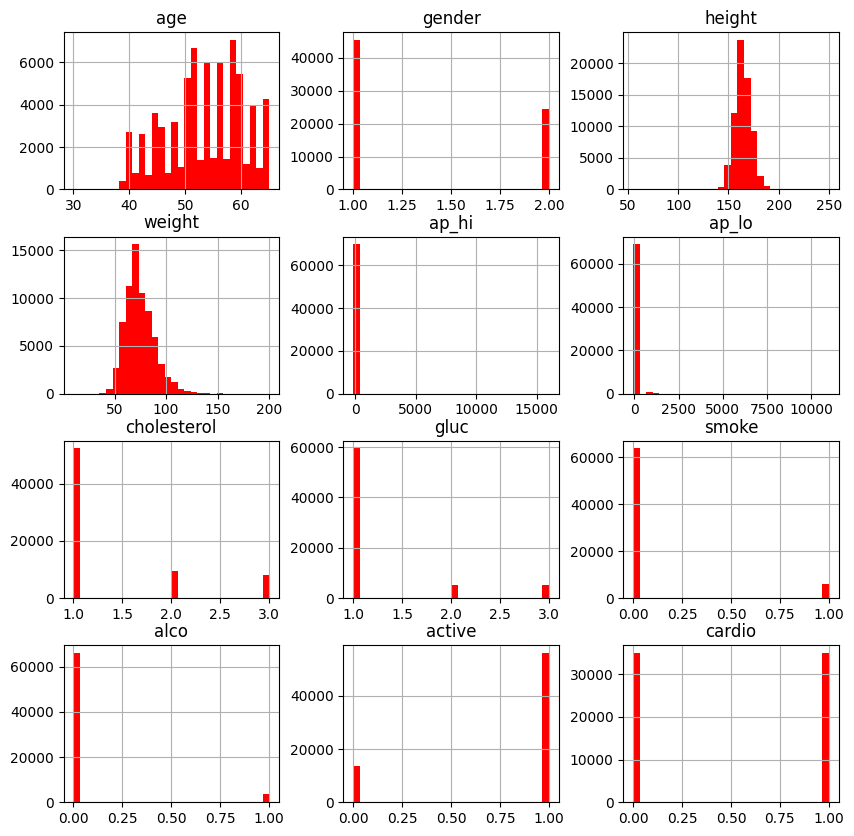

In [13]:
df_cardio.hist(bins=30,figsize=(10,10),color='r')


In [14]:
corr_matrix = df_cardio.corr()
corr_matrix

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.023017,-0.081456,0.053661,0.020793,0.017754,0.154386,0.098596,-0.047884,-0.029918,-0.009819,0.237749
gender,-0.023017,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081456,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053661,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020793,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017754,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154386,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098596,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047884,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029918,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


<Axes: >

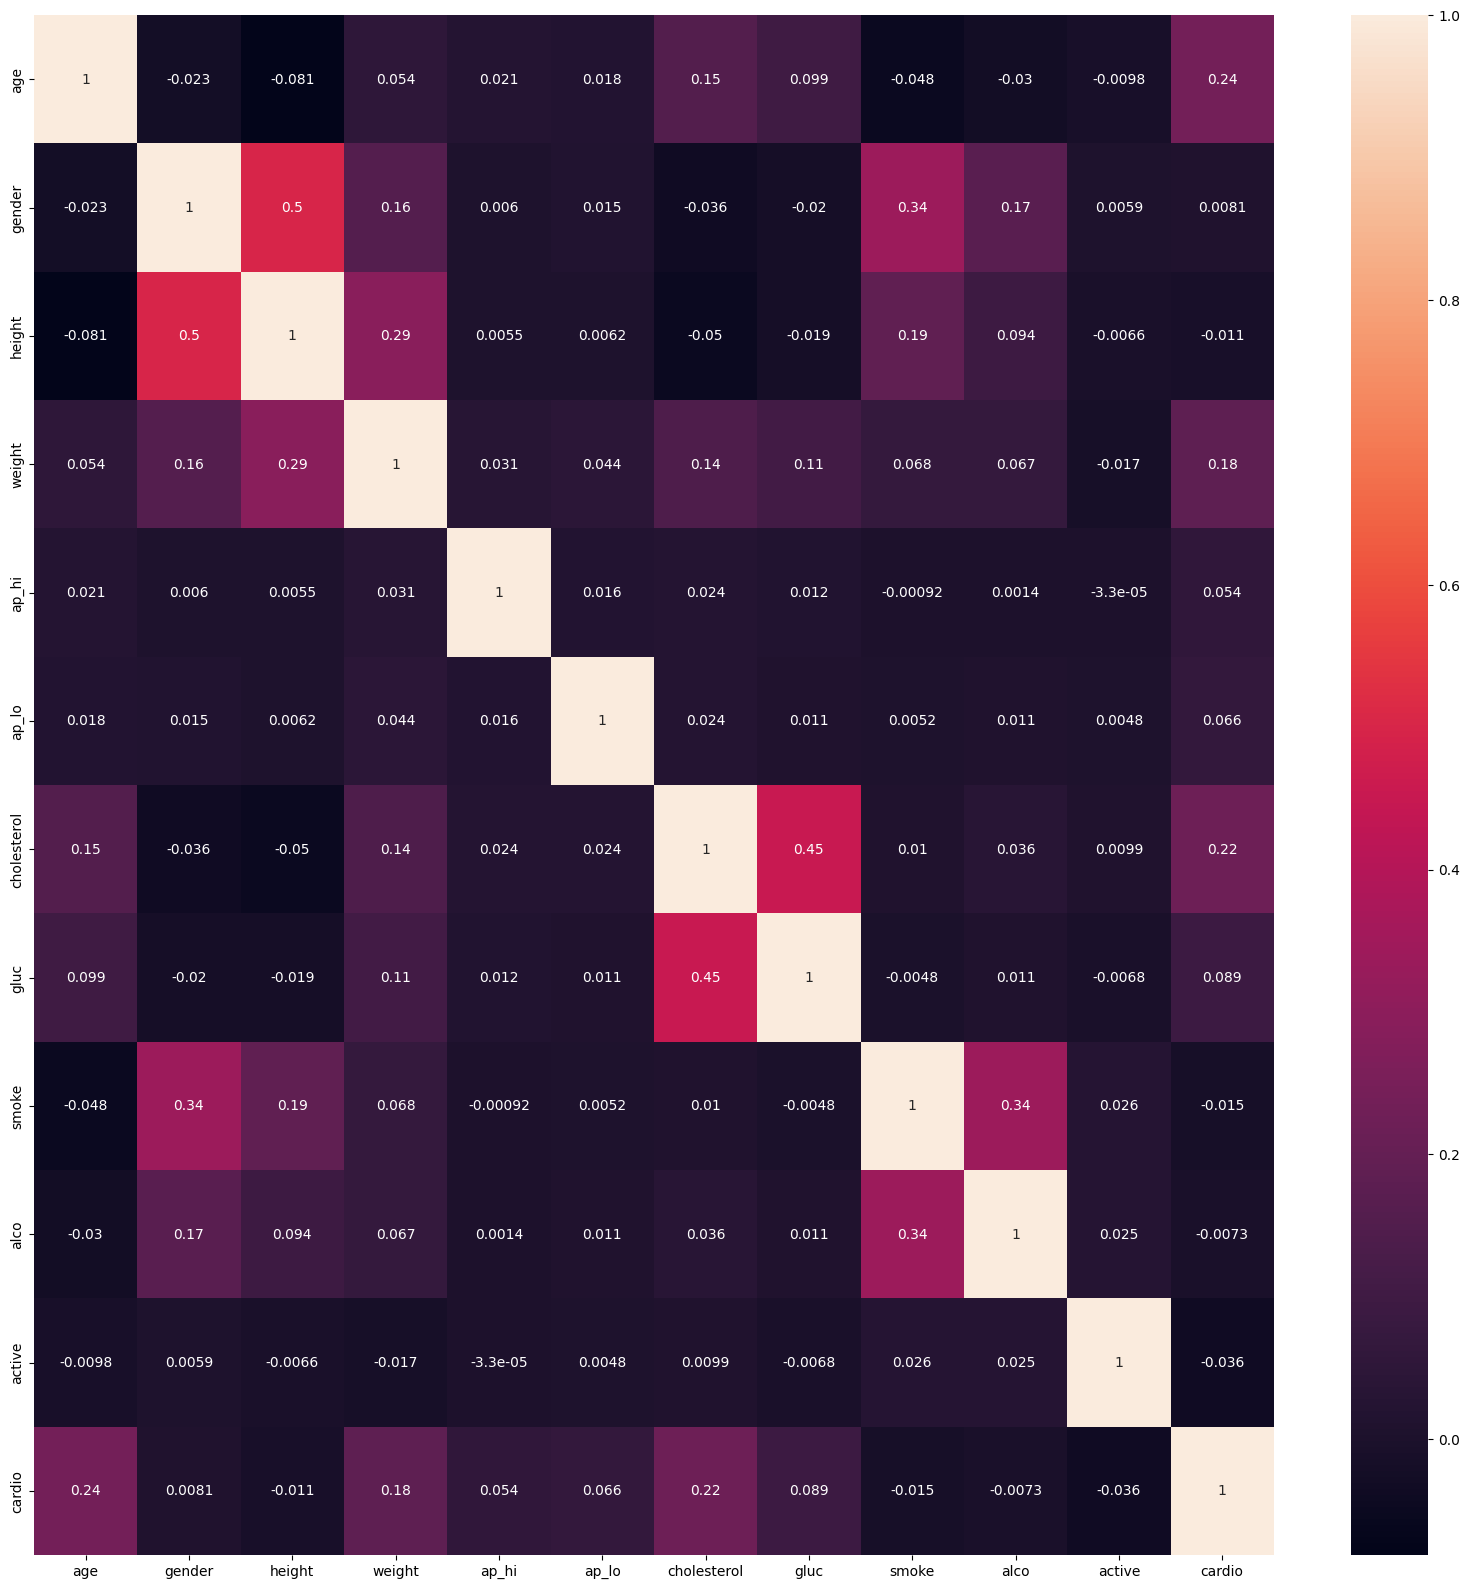

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,annot=True)


# Split dataset to create model looking for trends


In [16]:
Y = df_cardio['cardio']
X = df_cardio.drop(columns = 'cardio')

In [17]:
X.shape

(70000, 11)

In [18]:
Y.shape

(70000,)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [21]:
X_train.shape

(56000, 11)

In [22]:
Y_train.shape

(56000,)

In [23]:
X_test.shape


(14000, 11)

In [24]:
Y_test.shape

(14000,)

# Using XG-BOOST algorithm to perform classification problem with our data 

In [25]:
from xgboost import XGBClassifier 

Train an XG boost classifier model 

In [26]:
xgb_classifier = XGBClassifier(objective='binary:logistic',eval_metric='error',learning_rate=0.1,max_depth=1,n_estimators=10)
xgb_classifier.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [27]:
result = xgb_classifier.score(X_test,Y_test)
print('Accuracy {}'.format(result))

Accuracy 0.715


In [28]:
y_predict = xgb_classifier.predict(X_test)
y_predict

array([1, 0, 1, ..., 0, 0, 1])

In [29]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.68      0.80      0.74      7022
           1       0.76      0.63      0.69      6978

    accuracy                           0.71     14000
   macro avg       0.72      0.71      0.71     14000
weighted avg       0.72      0.71      0.71     14000



<Axes: >

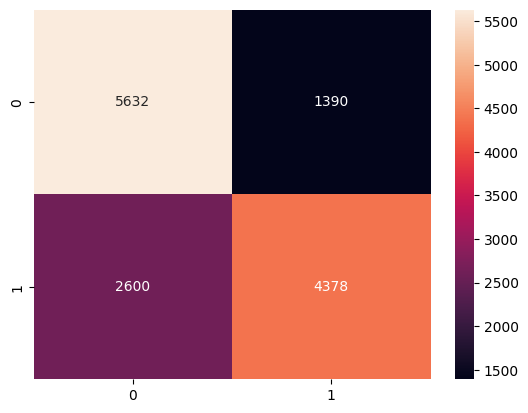

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_predict)
sns.heatmap(cm,fmt='d',annot=True)

# Titanic dataset do each passenger survive or not?

In [31]:
df_titanic_train = pd.read_csv('/kaggle/input/titanic-proper-dataset/train.csv')

In [32]:
df_titanic_test = pd.read_csv('/kaggle/input/titanic-proper-dataset/test.csv')

# Do our data is correct ?

In [33]:
df_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
df_titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [35]:
def count_female_survived(df_titanic_train):
    count_female_survived = 0
    for sex, survived in zip(df_titanic_train['Sex'], df_titanic_train['Survived']):
        if sex == 'female' and survived == 1:
            count_female_survived += 1

    return count_female_survived

# Call the function with your DataFrame as an argument
result = count_female_survived(df_titanic_train)

In [36]:
print(result)

233


In [37]:
df_titanic_train.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [38]:
df_titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Our data have some nulls but for cabin its not a problem we can give 0-1 for each person same for embarked but age is our worse scenario 
we have 3 possibilities:
1 Drop record with nulls in age - not a good idea we don't have so much data to do so 
2 Fill data with mean - in this scenario mean doesn't neacessearly can be apply 
3 Leave as it it - stay with it there

In [39]:
df_titanic_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [40]:
columns_to_encode_tr = ['Embarked', 'Sex']
columns_to_keep_tr = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin']
df_titanic_encoded_tr = pd.get_dummies(df_titanic_train[columns_to_encode_tr])

In [41]:
df_titanic_encoded_tr.head()

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,False,False,True,False,True
1,True,False,False,True,False
2,False,False,True,True,False
3,False,False,True,True,False
4,False,False,True,False,True


In [42]:
df_titanic_corr_tr = pd.concat([df_titanic_train[columns_to_keep_tr], df_titanic_encoded_tr], axis=1)

In [43]:
df_titanic_corr_tr[['Embarked_C', 'Embarked_Q','Embarked_S', 'Sex_female', 'Sex_male']] = df_titanic_corr_tr[['Embarked_C', 'Embarked_Q','Embarked_S', 'Sex_female', 'Sex_male']].astype('int64')

In [44]:
df_titanic_corr_tr.head(2)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0


In [45]:
df_titanic_corr_tr['Cabin_ind'] = df_titanic_train['Cabin'].fillna(0).apply(lambda x: 1 if x != 0 else 0)

In [46]:
df_titanic_corr_tr = df_titanic_corr_tr.drop(columns = ['Ticket','Cabin','Name'])

In [47]:
df_titanic_corr_tr.tail(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabin_ind
886,887,0,2,27.0,0,0,13.00,0,0,1,0,1,0
887,888,1,1,19.0,0,0,30.00,0,0,1,1,0,1
888,889,0,3,NaN,1,2,23.45,0,0,1,1,0,0
889,890,1,1,26.0,0,0,30.00,1,0,0,0,1,1
890,891,0,3,32.0,0,0,7.75,0,1,0,0,1,0


In [48]:
df_titanic_corr_tr_heat = df_titanic_corr_tr.corr()

<Axes: >

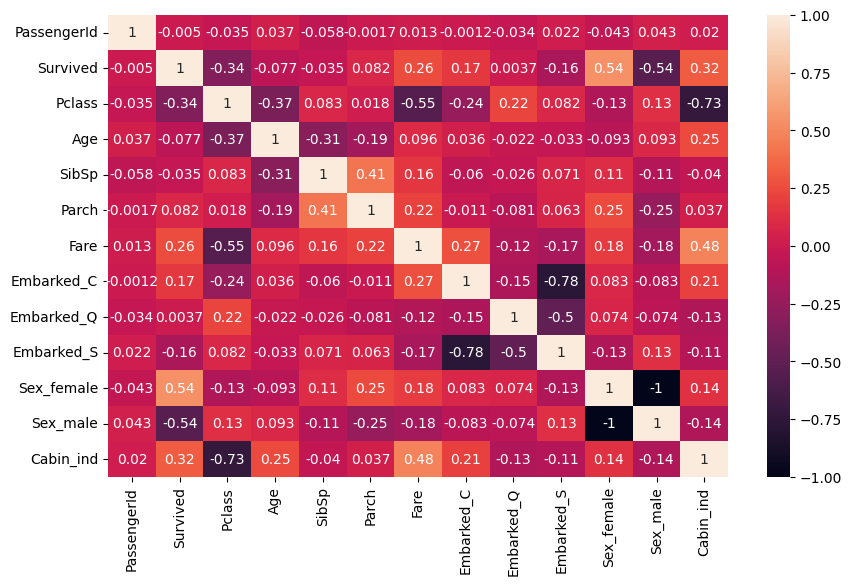

In [49]:
plt.figure(figsize=(10,6))
sns.heatmap(df_titanic_corr_tr_heat,annot=True)

In [50]:
#Splitting Data
Y = df_titanic_corr_tr['Survived']
X = df_titanic_corr_tr.drop(columns='Survived')

In [51]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [52]:
xgb_classifier_titanic = XGBClassifier(objective='binary:logistic',n_estimators=10,max_depth=3,learning_rate=0.1)
xgb_classifier_titanic.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [53]:
 results = xgb_classifier_titanic.score(X_test,Y_test)
print('Accuracy: {}'.format(results))

Accuracy: 0.7988826815642458


In [54]:
y_predictor = xgb_classifier_titanic.predict(X_test)
y_predictor

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0])

In [55]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_predictor))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       113
           1       0.76      0.67      0.71        66

    accuracy                           0.80       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179



<Axes: >

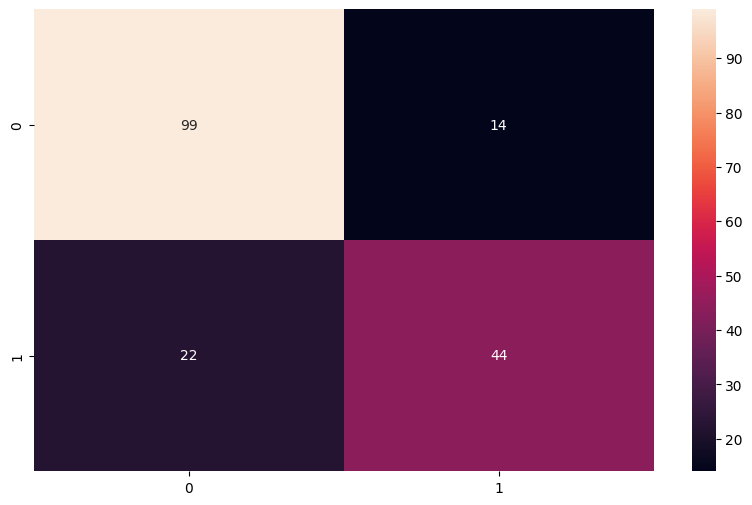

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_predictor)
plt.figure(figsize=(10,6))
sns.heatmap(cm,fmt='d',annot=True)

### Cleaning test model

In [57]:
df_titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [58]:
columns_to_encode_test = ['Embarked', 'Sex']
columns_to_keep_test = ['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin']
df_titanic_encoded_test = pd.get_dummies(df_titanic_test[columns_to_encode_test])

In [59]:
df_titanic_corr_test = pd.concat([df_titanic_test[columns_to_keep_test], df_titanic_encoded_test], axis=1)

In [60]:
df_titanic_corr_test[['Embarked_C', 'Embarked_Q','Embarked_S', 'Sex_female', 'Sex_male']] = df_titanic_corr_test[['Embarked_C', 'Embarked_Q','Embarked_S', 'Sex_female', 'Sex_male']].astype('int64')

In [61]:
df_titanic_corr_test['Cabin_ind'] = df_titanic_test['Cabin'].fillna(0).apply(lambda x: 1 if x != 0 else 0)

In [62]:
df_titanic_corr_test = df_titanic_corr_test.drop(columns = ['Ticket','Cabin','Name'])

In [63]:
df_titanic_corr_test.tail(1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabin_ind
417,1309,3,NaN,1,1,22.3583,1,0,0,0,1,0


In [64]:
y_test_set = xgb_classifier_titanic.predict(df_titanic_corr_test)

In [65]:
df_gender = pd.read_csv('/kaggle/input/titanic-proper-dataset/gender_submission.csv')


In [66]:
df_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [67]:
df_merged = df_titanic_corr_test.merge(df_gender,on='PassengerId')

In [68]:
df_merged.tail()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabin_ind,Survived
413,1305,3,NaN,0,0,8.0500,0,0,1,0,1,0,0
414,1306,1,39.0,0,0,108.9000,1,0,0,1,0,1,1
415,1307,3,38.5,0,0,7.2500,0,0,1,0,1,0,0
416,1308,3,NaN,0,0,8.0500,0,0,1,0,1,0,0
417,1309,3,NaN,1,1,22.3583,1,0,0,0,1,0,0


In [69]:
#from sklearn.metrics import classification_report
##print(classification_report(df_titanic_corr_test,y_test_set))

# Titanic dataset do each passenger survive or not? (FAILED MODEL AND EXPLANATION)

In [70]:
df_titanic = pd.read_csv('/kaggle/input/titanic/tested.csv')

In [71]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [72]:
def count_female_survived(df_titanic):
    count_female_survived = 0
    for sex, survived in zip(df_titanic['Sex'], df_titanic['Survived']):
        if sex == 'female' and survived == 1:
            count_female_survived += 1

    return count_female_survived

# Call the function with your DataFrame as an argument
result = count_female_survived(df_titanic)


In [73]:
print(result)

152


In [74]:
df_titanic.groupby('Survived').count()
#well as we can see 0 male survived and all females were get second chance so our model will be quite a bias right there  

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,266,266,266,266,205,266,266,266,265,47,266
1,152,152,152,152,127,152,152,152,152,44,152


In [75]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [76]:
df_titanic['Cabin'].isnull().sum()

327

In [77]:
df_titanic['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [78]:
columns_to_encode = ['Embarked', 'Sex']
columns_to_keep = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin']
df_titanic_encoded = pd.get_dummies(df_titanic[columns_to_encode])


In [79]:
df_titanic_encoded 

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,False,True,False,False,True
1,False,False,True,True,False
2,False,True,False,False,True
3,False,False,True,False,True
4,False,False,True,True,False
...,...,...,...,...,...
413,False,False,True,False,True
414,True,False,False,True,False
415,False,False,True,False,True
416,False,False,True,False,True


In [80]:
df_titanic_corr = pd.concat([df_titanic[columns_to_keep], df_titanic_encoded], axis=1)

In [81]:
df_titanic_corr[['Embarked_C', 'Embarked_Q','Embarked_S', 'Sex_female', 'Sex_male']] = df_titanic_corr[['Embarked_C', 'Embarked_Q','Embarked_S', 'Sex_female', 'Sex_male']].astype('int64')

In [82]:
df_titanic_corr.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,892,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0,1,0,0,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,0,1,1,0
2,894,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,0,1,0,0,1
3,895,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0,0,1,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,0,1,1,0


In [83]:
df_titanic_corr['Cabin_ind'] = df_titanic['Cabin'].fillna(0).apply(lambda x: 1 if x != 0 else 0)

In [84]:
df_titanic_corr.head(1)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabin_ind
0,892,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0,1,0,0,1,0


In [85]:
df_titanic_corr = df_titanic_corr.drop(columns = ['Ticket','Cabin','Name'])

In [86]:
df_titanic_corr.tail(1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabin_ind
417,1309,0,3,NaN,1,1,22.3583,1,0,0,0,1,0


In [87]:
df_titanic_corr.isnull().sum()
# 86 nulls in age which is really important for us in making prediction 

PassengerId     0
Survived        0
Pclass          0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Sex_female      0
Sex_male        0
Cabin_ind       0
dtype: int64

In [88]:
corr_matrix_titanic = df_titanic_corr.corr()
corr_matrix_titanic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabin_ind
PassengerId,1.000000,-0.023245,-0.026751,-0.034102,0.003818,0.043080,0.008211,-0.027419,-0.035731,0.048008,-0.023245,0.023245,0.006462
Survived,-0.023245,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514,0.033684,0.115574,-0.105883,1.000000,-1.000000,0.131464
Pclass,-0.026751,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147,-0.318543,0.252608,0.120783,-0.108615,0.108615,-0.690579
Age,-0.034102,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932,0.180601,-0.017956,-0.158295,-0.000013,0.000013,0.377686
SibSp,0.003818,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539,-0.016365,-0.098824,0.079367,0.099943,-0.099943,0.073067
Parch,0.043080,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046,-0.005791,-0.132948,0.092201,0.159120,-0.159120,0.037237
Fare,0.008211,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000,0.312161,-0.155562,-0.178582,0.191514,-0.191514,0.560843
Embarked_C,-0.027419,0.033684,-0.318543,0.180601,-0.016365,-0.005791,0.312161,1.000000,-0.199786,-0.767375,0.033684,-0.033684,0.361643
Embarked_Q,-0.035731,0.115574,0.252608,-0.017956,-0.098824,-0.132948,-0.155562,-0.199786,1.000000,-0.474962,0.115574,-0.115574,-0.166981
Embarked_S,0.048008,-0.105883,0.120783,-0.158295,0.079367,0.092201,-0.178582,-0.767375,-0.474962,1.000000,-0.105883,0.105883,-0.215525


<Axes: >

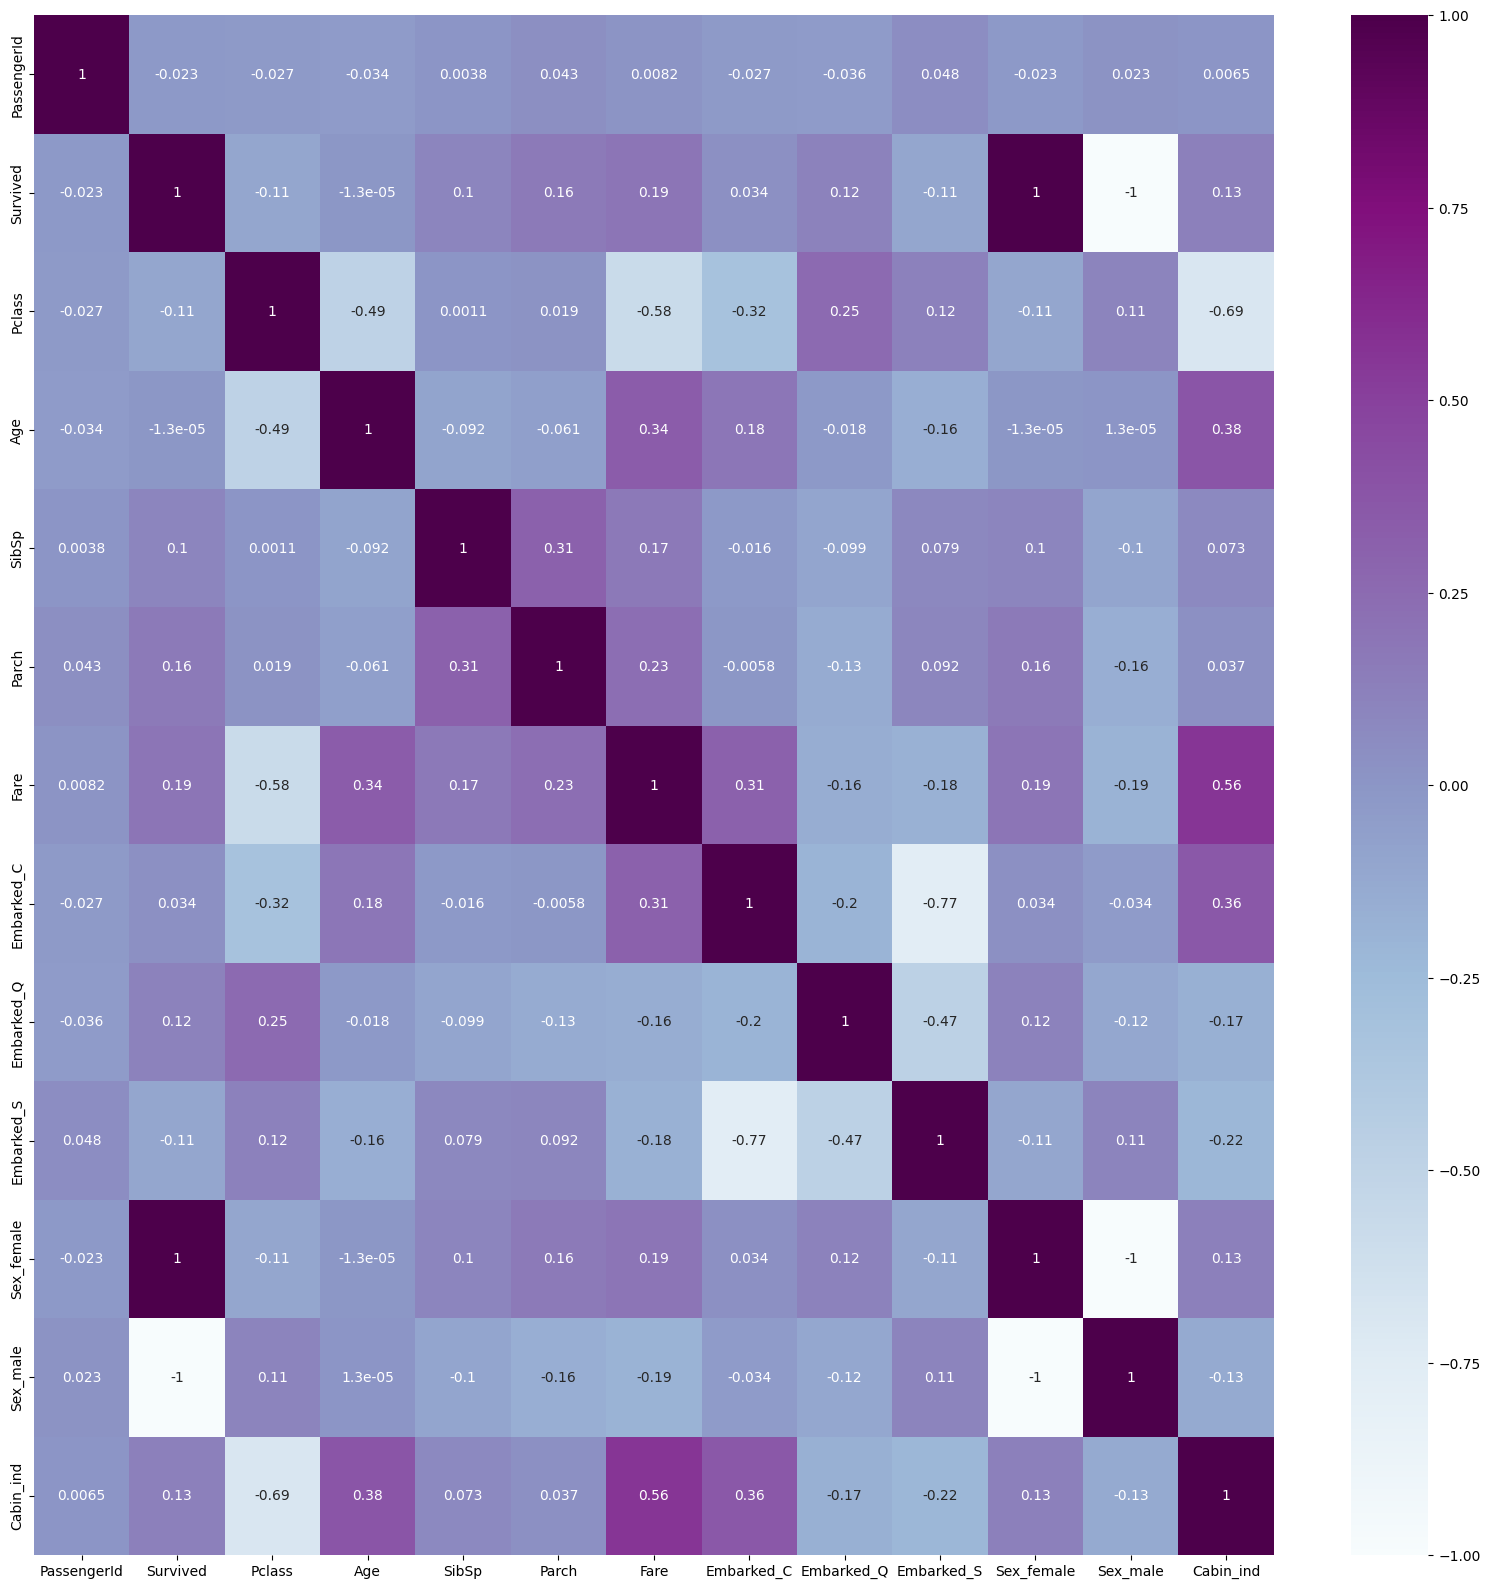

In [89]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix_titanic,annot=True,cmap='BuPu')

In [90]:
#split data set 
Y = df_titanic_corr['Survived']
X = df_titanic_corr.drop(columns='Survived')

In [91]:
Y.shape

(418,)

In [92]:
X.shape

(418, 12)

In [93]:
X.head(1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabin_ind
0,892,3,34.5,0,0,7.8292,0,1,0,0,1,0


In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [96]:
X_train.shape

(334, 12)

In [97]:
X_test.shape

(84, 12)

In [98]:
from xgboost import XGBClassifier 

In [99]:
#Load XG-Boost algorithm
xgb_classifier_titanic = XGBClassifier(objective='binary:logistic',n_estimators=10,max_depth=3,learning_rate=0.1)
xgb_classifier_titanic.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [100]:
result_titanic = xgb_classifier_titanic.score(X_test,Y_test)
print('Accuracy of model is: {}'.format(result_titanic))

Accuracy of model is: 1.0


In [101]:
y_predict_titanic = xgb_classifier_titanic.predict(X_test) 
y_predict_titanic

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0])

In [102]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_predict_titanic))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        38

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



<Axes: >

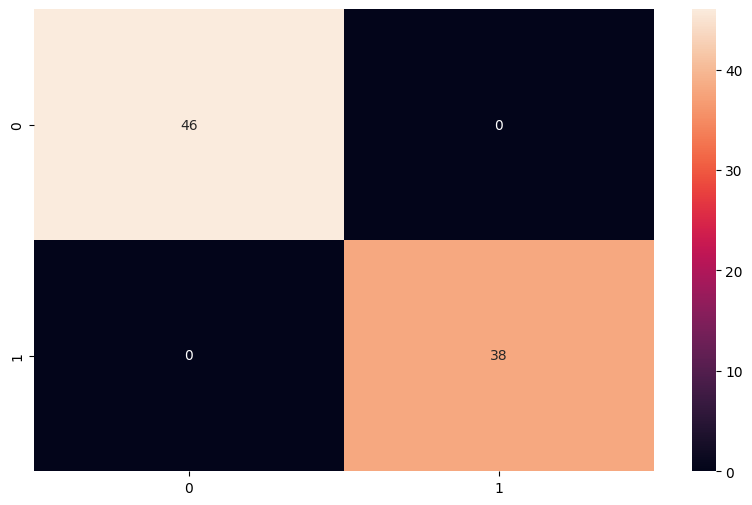

In [103]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_predict_titanic)
plt.figure(figsize=(10,6))
sns.heatmap(cm,fmt='d',annot=True)

In [104]:
labels = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male', 'Cabin_ind']

random_values = [np.random.randint(1, 1000),  # PassengerId
                 4,       # Pclass
                 np.random.randint(1, 80),      # Age
                 np.random.randint(0, 5),       # SibSp
                 np.random.randint(0, 5),       # Parch
                 np.random.uniform(0, 500),     # Fare
                 0,       # Embarked_C
                 0,       # Embarked_Q
                 1,       # Embarked_S
                 1,       # Sex_female
                 0,       # Sex_male
                 np.random.randint(0, 2)]       # Cabin_ind

# Create a DataFrame with the random sample
random_sample = pd.DataFrame([random_values], columns=labels)

print(random_sample)

   PassengerId  Pclass  Age  SibSp  Parch        Fare  Embarked_C  Embarked_Q  \
0          862       4   55      0      0  281.770095           0           0   

   Embarked_S  Sex_female  Sex_male  Cabin_ind  
0           1           1         0          1  


In [105]:
prediction = xgb_classifier_titanic.predict(random_sample)

print("Prediction:", prediction)

Prediction: [1]


# Creating a model for checking diabetes disease